<a href="https://colab.research.google.com/github/coder-penguin/ML/blob/master/tutorial/scikit_learn_tutorial_dimred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sample code for dimension reduction

Load libraries

In [0]:
import time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.manifold import LocallyLinearEmbedding, MDS, TSNE, Isomap
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_swiss_roll
from sklearn.metrics import mean_squared_error

Read data

In [0]:
X, color = make_swiss_roll(n_samples=1500)

###Unfolod data

In [0]:
def unfold(model, X, key):
    t0 = time.time()
    X_reduced = model.fit_transform(X)
    print('Consumed time: %g sec. ' % (time.time() - t0))

    fig = plt.figure(figsize=(20, 5))
    ax = fig.add_subplot(1,4,1, projection='3d')
    ax.view_init(7, -80)
    ax.set_title("Original data")
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral, edgecolor='k')

    ax = fig.add_subplot(1,4,2, projection='3d')
    ax.view_init(7, -80)
    ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=color, cmap=plt.cm.Spectral, edgecolor='k')
    ax.set_title("Reduced data")

    ax = fig.add_subplot(1,4,3)
    ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=color, cmap=plt.cm.Spectral, edgecolor='k')
    ax.set_title('Reduced data')

    if 'PCA' in key :
        X_reconstructed = model.inverse_transform(X_reduced)
        ax = fig.add_subplot(1,4,4, projection='3d')
        ax.view_init(7, -80)
        ax.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], X_reconstructed[:, 2], c=color, cmap=plt.cm.Spectral, edgecolor='k')
        ax.set_title('Reconstructed data')
        err = mean_squared_error(X_reconstructed, X)
        print('Reconstruction error: %g.' % err)
    elif 'LLE' in key :
        err = model.reconstruction_error_
        print('Reconstruction error: %g.' % err)

    plt.show()

In [0]:
models = {'PCA' : PCA(n_components=2),
                'randomized PCA' : PCA(n_components=2, svd_solver='randomized'),
                'kernel PCA' : KernelPCA(n_components=2, kernel='rbf', gamma=0.04, fit_inverse_transform=True),
                'LLE' : LocallyLinearEmbedding(n_neighbors=12, n_components=2),
                'hessian LLE' : LocallyLinearEmbedding(n_neighbors=12, n_components=2, method='hessian'),
                'modified LLE' : LocallyLinearEmbedding(n_neighbors=12, n_components=2, method='modified'),
                'MDS' :  MDS(n_components=2, max_iter=100, n_init=1),
                'TSNE' : TSNE(n_components=2, init='pca', random_state=0),
                'Isomap' : Isomap(n_neighbors=12, n_components=2)
               }

PCA
Consumed time: 0.0107937 sec. 
Reconstruction error: 12.0832.


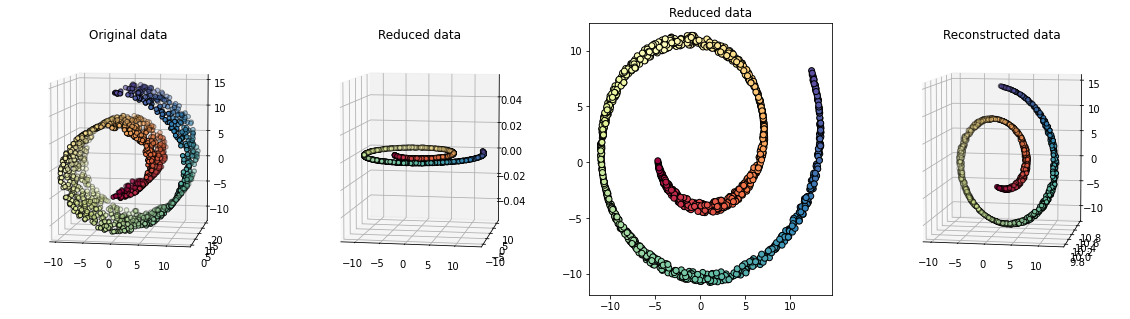

randomized PCA
Consumed time: 0.00580502 sec. 
Reconstruction error: 12.0832.


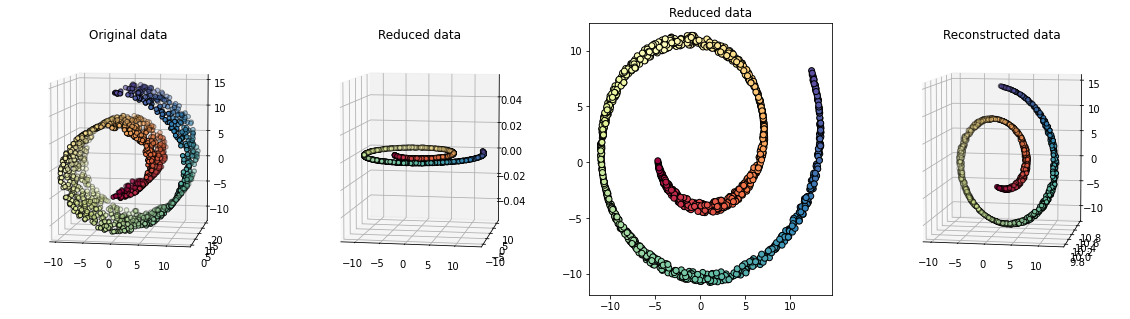

kernel PCA
Consumed time: 0.542181 sec. 
Reconstruction error: 31.6416.


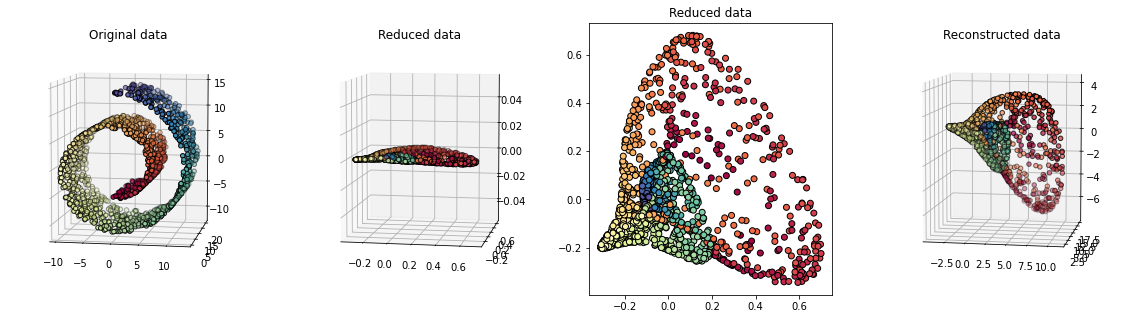

LLE
Consumed time: 0.223319 sec. 
Reconstruction error: 9.26003e-08.


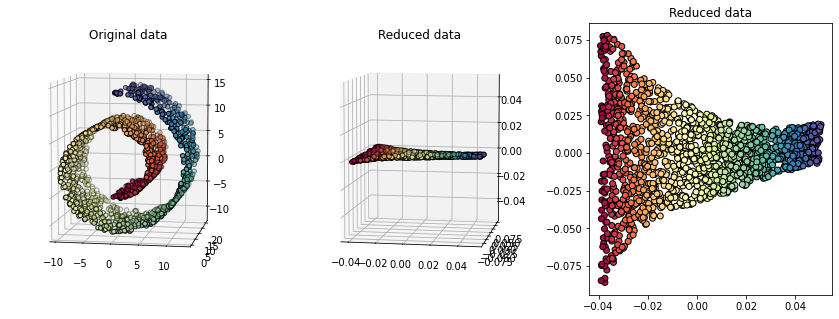

hessian LLE
Consumed time: 0.522666 sec. 
Reconstruction error: 1.30525e-06.


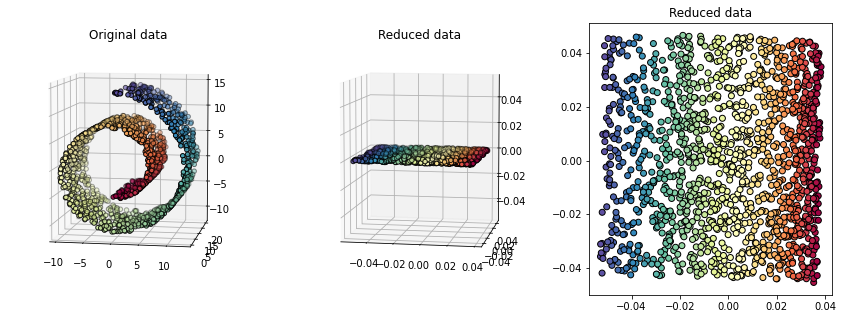

modified LLE
Consumed time: 0.444903 sec. 
Reconstruction error: 9.95572e-07.


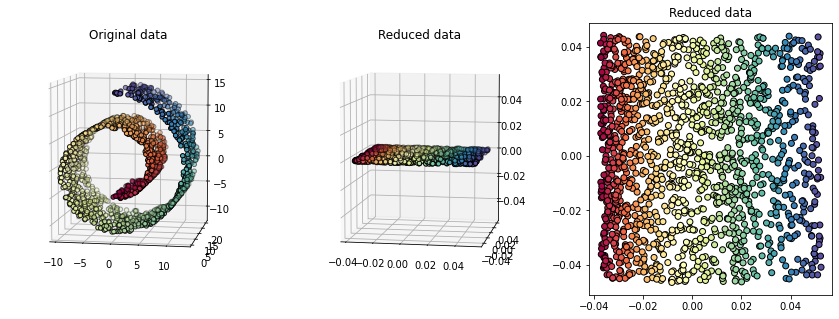

MDS
Consumed time: 4.76979 sec. 


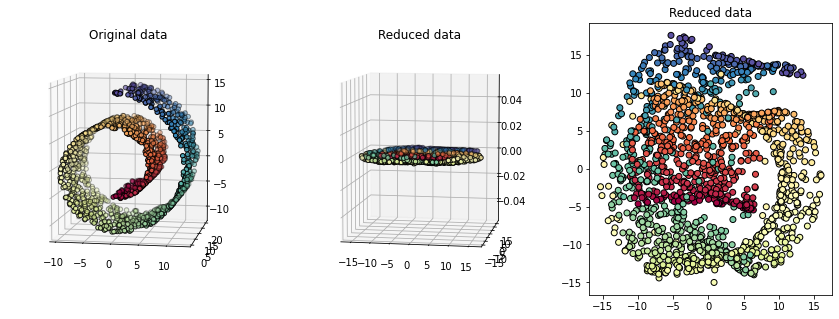

TSNE
Consumed time: 8.67912 sec. 


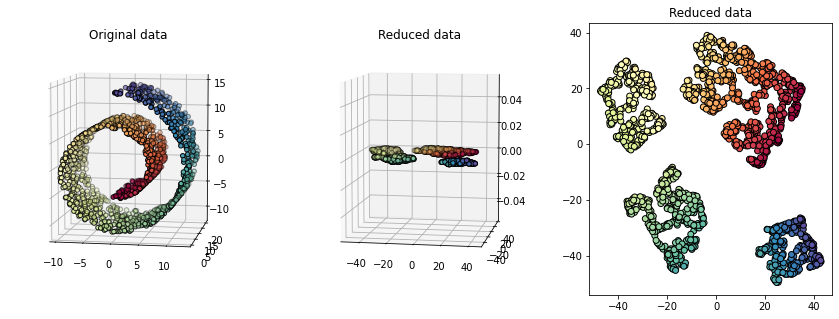

Isomap
Consumed time: 1.37399 sec. 


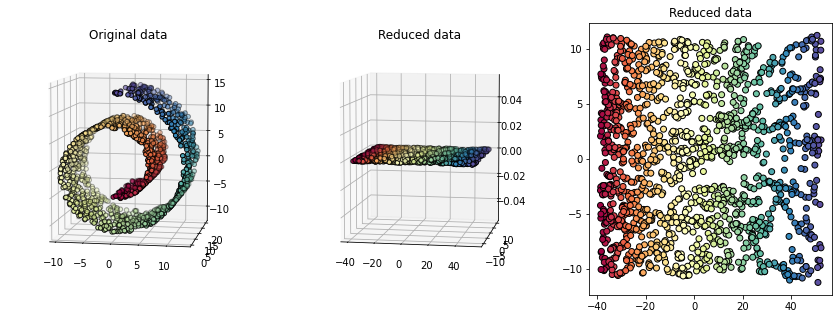

In [5]:
for key in models:
    print(key)
    unfold(models[key], X, key)